# Market Basket Analysis <br>
Nicholas Gunawan - C142100099 <br>
Ferdinand Marco - C14210094 <br>
Darrrel Cornelius - C14210025 <br>
Kent Maynard - C14210073 <br>

link dataset : https://www.kaggle.com/datasets/yekahaaagayeham/online-retail-for-market-basket-analysis

### Attribute Information:
- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction.** If this code starts with the letter 'c', it indicates a cancellation.**  
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.  
- Description: Product (item) name. Nominal.  
- Quantity: The quantities of each product (item) per transaction. Numeric.  
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.  
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.  
- Country: Country name. Nominal, the name of the country where each customer resides.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
retail = pd.read_excel('Online Retail.xlsx')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
retail0 = retail

In [6]:
retail = retail0

In [7]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Data Preprocessing

In [8]:
# cek data duplikat
retail.duplicated().sum()

5268

In [9]:
# drop data duplikat
retail.drop_duplicates(inplace=True)

In [10]:
#lihat baris mana saja yang kosong
retail.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

Drop kolom costumer ID, karena tidak dipakai

In [11]:
retail = retail.drop(columns='CustomerID')
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 32.8+ MB


Drop baris yang kosong

In [12]:
# drop null values
retail = retail.dropna()
retail.shape

(535187, 7)

In [13]:
#mencari barang yang dicancel sehingga quantity < 0
retail[retail.InvoiceNo.str.startswith('C', na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,United Kingdom
...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,United Kingdom


Drop quantity yang < 0

In [14]:
retail = retail[retail['Quantity'] > 0]
retail[retail['Quantity'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country


In [15]:
#removes spaces from beginning and end
retail['Description'] = retail['Description'].str.strip()                
#converting invoice jadi string
retail['InvoiceNo'] = retail['InvoiceNo'].astype('str')    
retail.head()     

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


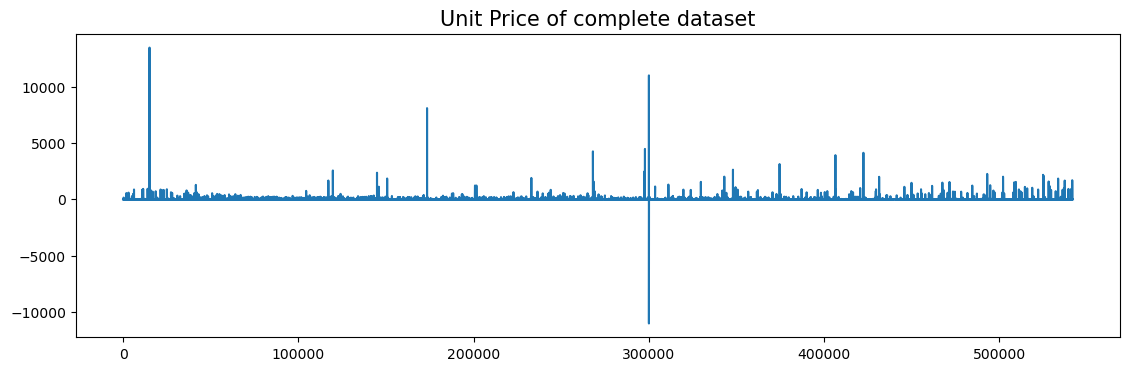

In [16]:
plt.figure(figsize=(22,7))
plt.subplot(2,2,1)
retail.UnitPrice.plot()
plt.title('Unit Price of complete dataset', fontsize=15)

plt.tight_layout()

In [17]:
# check UnitPrice = 0
retail[retail['UnitPrice']== 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
6391,536941,22734,amazon,20,2010-12-03 12:08:00,0.0,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.0,United Kingdom
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,Germany
14335,537534,85064,CREAM SWEETHEART LETTER RACK,1,2010-12-07 11:48:00,0.0,United Kingdom
14336,537534,84832,ZINC WILLIE WINKIE CANDLE STICK,1,2010-12-07 11:48:00,0.0,United Kingdom
...,...,...,...,...,...,...,...
524622,580609,22927,Amazon,1,2011-12-05 11:41:00,0.0,United Kingdom
535325,581202,23404,check,41,2011-12-07 18:30:00,0.0,United Kingdom
535334,581211,22142,check,14,2011-12-07 18:36:00,0.0,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,United Kingdom


In [18]:
retail[retail['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,United Kingdom


In [19]:
temp= retail[retail['UnitPrice']==0]
temp[temp['Description'].notna()].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
6391,536941,22734,amazon,20,2010-12-03 12:08:00,0.0,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.0,United Kingdom
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,Germany
14335,537534,85064,CREAM SWEETHEART LETTER RACK,1,2010-12-07 11:48:00,0.0,United Kingdom
14336,537534,84832,ZINC WILLIE WINKIE CANDLE STICK,1,2010-12-07 11:48:00,0.0,United Kingdom
14337,537534,84692,BOX OF 24 COCKTAIL PARASOLS,2,2010-12-07 11:48:00,0.0,United Kingdom
14338,537534,48184,DOORMAT ENGLISH ROSE,3,2010-12-07 11:48:00,0.0,United Kingdom
14339,537534,48111,DOORMAT 3 SMILEY CATS,1,2010-12-07 11:48:00,0.0,United Kingdom
14340,537534,22697,GREEN REGENCY TEACUP AND SAUCER,1,2010-12-07 11:48:00,0.0,United Kingdom
14341,537534,22682,FRENCH BLUE METAL DOOR SIGN 7,1,2010-12-07 11:48:00,0.0,United Kingdom


In [20]:
#stock code mengandung gift
retail[retail['StockCode'].str.contains('gift', na=False, regex=True)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
38248,539492,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,1,2010-12-20 10:14:00,34.04,United Kingdom
42057,539958,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,1,2010-12-23 13:26:00,42.55,United Kingdom
44725,540238,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-01-05 14:44:00,25.53,United Kingdom
44794,540238,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-01-05 14:44:00,17.02,United Kingdom
55589,540995,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-01-13 09:30:00,16.67,United Kingdom
91278,544089,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-02-15 17:51:00,16.67,United Kingdom
94054,544323,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-02-17 15:51:00,25.00,United Kingdom
95034,544434,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-02-18 16:12:00,25.00,United Kingdom
112442,545895,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2011-03-07 17:14:00,8.33,United Kingdom
145463,548893,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,1,2011-04-04 15:54:00,33.33,United Kingdom


In [21]:
#random check
retail[retail['InvoiceNo']=='539492']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
37968,539492,10135,COLOURING PENCILS BROWN TUBE,1,2010-12-20 10:14:00,2.51,United Kingdom
37969,539492,15034,PAPER POCKET TRAVELING FAN,2,2010-12-20 10:14:00,0.85,United Kingdom
37970,539492,15036,ASSORTED COLOURS SILK FAN,1,2010-12-20 10:14:00,1.28,United Kingdom
37971,539492,15060B,FAIRY CAKE DESIGN UMBRELLA,1,2010-12-20 10:14:00,8.47,United Kingdom
37972,539492,16048,TEATIME ROUND PENCIL SHARPENER,2,2010-12-20 10:14:00,0.85,United Kingdom
...,...,...,...,...,...,...,...
38246,539492,90197B,BLACK GLASS BRACELET W HEART CHARMS,1,2010-12-20 10:14:00,5.09,United Kingdom
38247,539492,90209C,PINK ENAMEL+GLASS HAIR COMB,1,2010-12-20 10:14:00,2.11,United Kingdom
38248,539492,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,1,2010-12-20 10:14:00,34.04,United Kingdom
38249,539492,DOT,DOTCOM POSTAGE,1,2010-12-20 10:14:00,396.81,United Kingdom


DATE TIME FORMATING

In [22]:
import datetime as datetime
from datetime import datetime

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12084\1134942626.py:6: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  retail['invoice_date']= pd.to_datetime(retail['invoice_date'], infer_datetime_format= True)


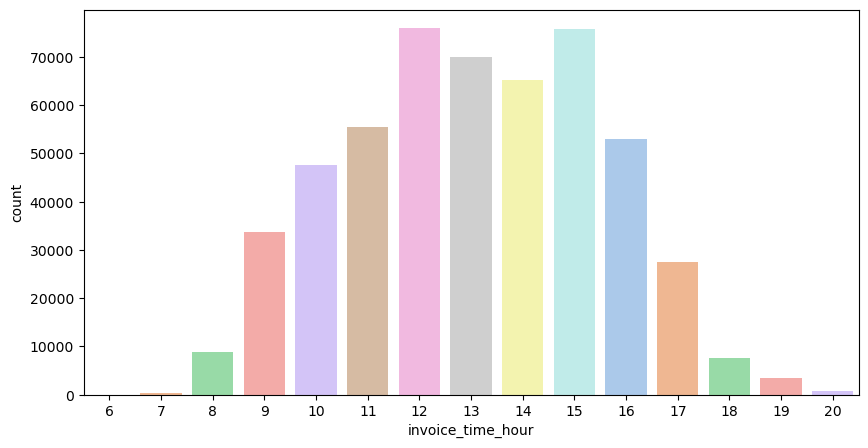

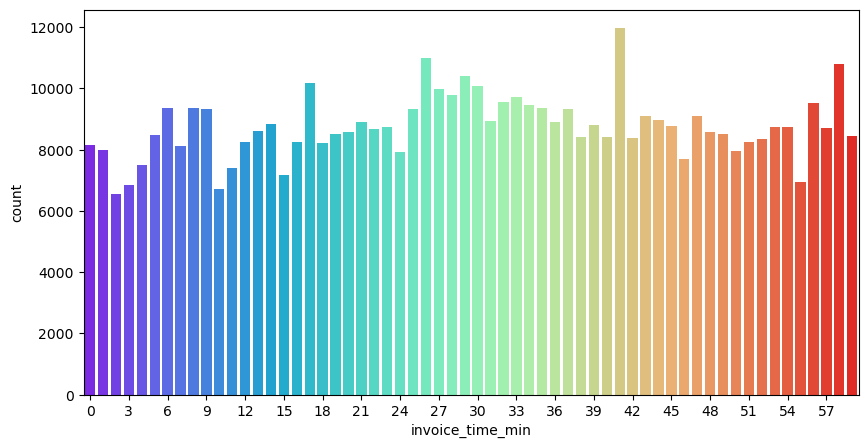

In [23]:
retail['invoice_date'] = retail['InvoiceDate'].dt.date
retail['invoice_time_hour'] = retail['InvoiceDate'].dt.hour
retail['invoice_time_min'] = retail['InvoiceDate'].dt.minute

### Converting invoice date to data time
retail['invoice_date']= pd.to_datetime(retail['invoice_date'], infer_datetime_format= True)
plt.figure(figsize=(10,5))
sns.countplot(x= 'invoice_time_hour', data=retail, palette= 'pastel');

plt.figure(figsize=(10,5))
sns.countplot(x= 'invoice_time_min', data=retail,  palette= 'rainbow')
plt.xticks(np.arange(0, 59+1, 3.0)); 

In [24]:
top_10_items = retail.groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index()
top_10_items = top_10_items.sort_values(by='Quantity', ascending=False).head(10)

print(top_10_items)


     StockCode                         Description  Quantity
2684     23843         PAPER CRAFT , LITTLE BIRDIE     80995
2128     23166      MEDIUM CERAMIC TOP STORAGE JAR     78033
2876     84077   WORLD WAR 2 GLIDERS ASSTD DESIGNS     54951
3909    85099B             JUMBO BAG RED RETROSPOT     48375
3922    85123A  WHITE HANGING HEART T-LIGHT HOLDER     37584
1103     22197                      POPCORN HOLDER     36749
391      21212     PACK OF 72 RETROSPOT CAKE CASES     36396
2982     84879       ASSORTED COLOUR BIRD ORNAMENT     36362
2025     23084                  RABBIT NIGHT LIGHT     30739
1381     22492              MINI PAINT SET VINTAGE     26633


In [25]:
#print bedasarkan country
retail['Country'].value_counts()

Country
United Kingdom          480551
Germany                   9027
France                    8393
EIRE                      7883
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1959
Portugal                  1492
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Unspecified                442
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     292
Hong Kong                  280
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58


## Market Basket Analysis

In [26]:
retail_france = retail[retail.Country == 'France']
retail_france.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,invoice_date,invoice_time_hour,invoice_time_min
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,France,2010-12-01,8,45
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,France,2010-12-01,8,45
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,France,2010-12-01,8,45
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,France,2010-12-01,8,45
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,France,2010-12-01,8,45


In [27]:
retail_france.loc[:,'DayOfWeek'] = retail_france['invoice_date'].dt.day_name()
retail_france.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12084\3793701689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_france.loc[:,'DayOfWeek'] = retail_france['invoice_date'].dt.day_name()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,invoice_date,invoice_time_hour,invoice_time_min,DayOfWeek
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,France,2010-12-01,8,45,Wednesday
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,France,2010-12-01,8,45,Wednesday
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,France,2010-12-01,8,45,Wednesday
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,France,2010-12-01,8,45,Wednesday
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,France,2010-12-01,8,45,Wednesday


In [28]:
basket = pd.crosstab(index=retail_france['InvoiceNo'], columns=retail_france['Description'])
basket

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
retail_france.InvoiceNo.nunique()

392

In [30]:
retail_france.Description.nunique()

1563

In [31]:
basket = basket.applymap(lambda x: 1 if x>0 else 0)

In [32]:
basket = basket.drop(columns='POSTAGE')

In [33]:
from mlxtend.frequent_patterns import apriori, association_rules

In [34]:
frequent_itemsets = apriori(basket, min_support=0.07, use_colnames=True).sort_values(by='support', ascending=False).reset_index(drop=True)
frequent_itemsets

c:\Users\LENOVO\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.188776,(RABBIT NIGHT LIGHT)
1,0.181122,(RED TOADSTOOL LED NIGHT LIGHT)
2,0.170918,(PLASTERS IN TIN WOODLAND ANIMALS)
3,0.168367,(PLASTERS IN TIN CIRCUS PARADE)
4,0.158163,(ROUND SNACK BOXES SET OF4 WOODLAND)
5,0.153061,(LUNCH BAG RED RETROSPOT)
6,0.142857,(LUNCH BOX WITH CUTLERY RETROSPOT)
7,0.137755,(SET/6 RED SPOTTY PAPER CUPS)
8,0.137755,(RED RETROSPOT MINI CASES)
9,0.137755,(PLASTERS IN TIN SPACEBOY)


In [35]:
association_rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1).sort_values(by='lift', ascending=False).reset_index(drop=True)


In [36]:
association_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181,0.979224
1,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878,0.976465
2,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.102041,0.094388,0.073980,0.725000,7.681081,0.064348,3.293135,0.968652
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.094388,0.102041,0.073980,0.783784,7.681081,0.064348,4.153061,0.960466
4,(SET/6 RED SPOTTY PAPER PLATES),"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",0.127551,0.102041,0.099490,0.780000,7.644000,0.086474,4.081633,0.996251


In [37]:
def filter_rules(rules: pd.DataFrame, confidence: float = 0.7, lift: float = 5):
    return rules[(rules['confidence'] >= confidence) & (rules['lift'] >= lift)]

filter_rules(association_rules)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181,0.979224
1,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878,0.976465
2,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.102041,0.094388,0.073980,0.725000,7.681081,0.064348,3.293135,0.968652
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.094388,0.102041,0.073980,0.783784,7.681081,0.064348,4.153061,0.960466
4,(SET/6 RED SPOTTY PAPER PLATES),"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",0.127551,0.102041,0.099490,0.780000,7.644000,0.086474,4.081633,0.996251
5,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",(SET/6 RED SPOTTY PAPER PLATES),0.102041,0.127551,0.099490,0.975000,7.644000,0.086474,34.897959,0.967949
6,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,0.064088,3.283859,0.964734
7,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383,0.959283
8,"(SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...",(SET/6 RED SPOTTY PAPER CUPS),0.102041,0.137755,0.099490,0.975000,7.077778,0.085433,34.489796,0.956294
9,(SET/6 RED SPOTTY PAPER CUPS),"(SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...",0.137755,0.102041,0.099490,0.722222,7.077778,0.085433,3.232653,0.995904


In [53]:
sorted_rules = association_rules.sort_values(by='support', ascending=False)
sorted_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
11,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,0.104878,21.556122,0.981725
10,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.127551,0.122449,0.888889,6.968889,0.104878,7.852041,0.993343
21,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.137755,0.170918,0.104592,0.759259,4.442233,0.081047,3.443878,0.898687
20,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.170918,0.137755,0.104592,0.611940,4.442233,0.081047,2.221939,0.934634
25,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE),0.170918,0.168367,0.102041,0.597015,3.545907,0.073264,2.063681,0.866000


In [68]:
def recommendation_system_func(dataframe, sorted_rules):
    product_name = input("Enter a product id:")
    
    if product_name in list(dataframe["Description"].astype("str").unique()):
        recommendation_list = []
        for idx, product in enumerate(sorted_rules["antecedents"]):
            for j in list(product):
                if j == product_name:
                    recommendation_list.append(list(sorted_rules.iloc[idx]["consequents"])[0])
        recommendation_list = recommendation_list[:5]
        if len(recommendation_list) == 0:
            print("There is no product can be recommended!")
        else:
            print("Related products with product name -" , product_name , "can be seen below:")
        
            for p in recommendation_list:
                print(p)
            
    else:
        print("Invalid Product Id, try again!")

In [69]:
recommendation_system_func(retail_france, sorted_rules)

Related products with product name - ALARM CLOCK BAKELIKE PINK can be seen below:
ALARM CLOCK BAKELIKE GREEN
ALARM CLOCK BAKELIKE RED


In [66]:
retail_france.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,invoice_date,invoice_time_hour,invoice_time_min,DayOfWeek
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,France,2010-12-01,8,45,Wednesday
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,France,2010-12-01,8,45,Wednesday
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,France,2010-12-01,8,45,Wednesday
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,France,2010-12-01,8,45,Wednesday
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,France,2010-12-01,8,45,Wednesday
